In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pickle

%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker
from pylab import plot, show, savefig, xlim, figure, hold, ylim, legend, boxplot, setp, axes

#for exporting to Adobe Illustrator
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

## Load Empirical Base Recall scores from Max Marin

In [7]:
emp_basepair_recall_df = pd.read_csv('/n/data1/hms/dbmi/farhat/mm774/Projects/PacBio_Evaluation_Project/200328_PBvsI_VCeval_AnalysisDir/200328_EBR_H37rv_31CI_MM2vsPilon_V1/200328_EBR_H37rv_31CI_MM2vsPilon_V1.tsv' , sep = '\t')
emp_basepair_recall_df = emp_basepair_recall_df.loc[: , ['H37rv_RefPos_1based' , 'EmpiricalBasePairRecall']]
emp_basepair_recall_df.rename(columns = {'H37rv_RefPos_1based':'pos'}, inplace = True) 

In [8]:
emp_basepair_recall_df.head()

,pos,EmpiricalBasePairRecall
0,1,0.83871
1,2,0.83871
2,3,0.83871
3,4,0.83871
4,5,0.83871


In [20]:
thresholds = np.arange(0.0 , 1.01 , 0.01) #exclude 1.01 as that would exclude every reference position since max = 1.0
num_positions_dropped = []

for threshold_i in thresholds:
    
    num_positions_dropped.append( np.shape(emp_basepair_recall_df[emp_basepair_recall_df.EmpiricalBasePairRecall < threshold_i])[0] )

In [21]:
plt.style.use('ggplot')
plt.rcParams['lines.linewidth']=3
plt.rcParams['axes.facecolor']='1.0'
plt.rcParams['xtick.color']='black'
plt.rcParams['axes.grid']=True
plt.rcParams['axes.edgecolor']='black'
plt.rcParams['grid.color']= '1.0'
plt.rcParams.update({'font.size': 12})

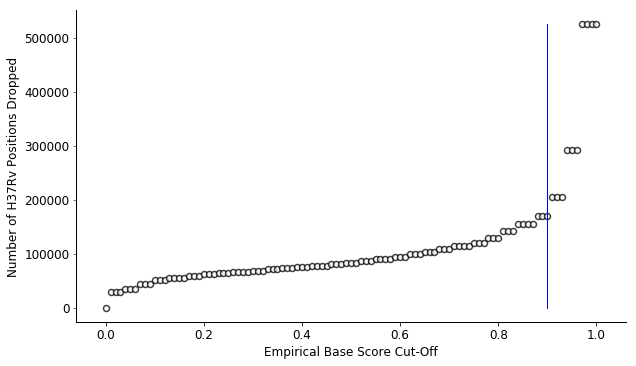

In [22]:
fig , ax = plt.subplots()

#SNP found in isolate denoted with a '1', sum across columns (isolates)
plt.scatter(thresholds , num_positions_dropped , color = '1.0' , edgecolor = 'k' , linewidth = 1.5 , alpha = 0.75)
plt.plot([0.9 , 0.9] , [0 , np.max(num_positions_dropped)] , color = 'blue' , linewidth = 1.0)

#plt.title('Distribution of pairwise SNP distances between 10,024 isolates', fontsize = 12, color = 'k')
plt.xlabel('Empirical Base Score Cut-Off', fontsize = 12, color = 'k')
plt.ylabel('Number of H37Rv Positions Dropped' , fontsize = 12, color = 'k')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(False)

ax.tick_params(labelcolor = 'k')

fig = plt.gcf()
fig.set_size_inches(9.0, 5.25)
fig.tight_layout()

plt.tick_params(axis='y', which='major', labelsize=12 , labelcolor = 'k')
plt.tick_params(axis='x', which='major', labelsize=12 , labelcolor = 'k')

plt.show()

## Bad Regions for IL mapping/variant calling: sites with empirical score < 0.90

In [25]:
np.shape( emp_basepair_recall_df[emp_basepair_recall_df.EmpiricalBasePairRecall < 0.90] )

(169630, 2)

In [26]:
H37Rv_positions_to_drop = list( emp_basepair_recall_df[emp_basepair_recall_df.EmpiricalBasePairRecall < 0.90].pos )

In [27]:
len(H37Rv_positions_to_drop)

169630

#### Export pickled list of H37Rv positions to drop when calling variants

In [28]:
with open('/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/rolling_DB_scrape/Genotypes/H37Rv_sites_with_low_EBR_to_drop.pkl', 'wb') as f:
    pickle.dump(H37Rv_positions_to_drop, f)

#### To load the list for use in variant calling

In [29]:
with open('/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/rolling_DB_scrape/Genotypes/H37Rv_sites_with_low_EBR_to_drop.pkl', 'rb') as f:
    H37Rv_positions_to_drop = pickle.load(f)